# 경로 확인

In [1]:
getwd()

[1] "C:/Users/codnj/MyProject/데이터 마이닝 프로젝트 - 머신러닝을 활용한 상수도관 누수 감지"

In [2]:
list.files()

[1] "데이터 마이닝 프로젝트 - 머신러닝을 활용한 상수도관 누수 감지 .ipynb"
[2] "상하수도 데이터(상수관로 누수 감지)"

In [1]:
.libPaths()

[1] "C:/Users/codnj/anaconda3/Lib/R/library"

# 라이브러리 설치 및 불러오기

In [1]:
library(purrr)
library(dplyr)
library(caret)
library(class)
library(rpart)
library(e1071)
library(xgboost)
library(randomForest)
library(pROC)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift



Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




# 데이터 통합

In [13]:
file1_path<-"상하수도 데이터(상수관로 누수 감지)/Training/누수감지데이터셋(Training)"
file2_path<-"상하수도 데이터(상수관로 누수 감지)/Validation/누수감지데이터셋(Validation)"

files1<-list.files(path=file1_path, pattern="*.csv", full.names=TRUE)
files2<-list.files(path=file2_path, pattern="*.csv", full.names=TRUE)

In [14]:
#library(purrr)
merged_data<-map_dfr(c(files1, files2), read.csv)

Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into charac

In [15]:
merged_data

site,sid,ldate,lrate,llevel,leaktype,X0HZ,X10HZ,X20HZ,X30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
S-4687025030,S-0359369085120315,20200708,90,256,out,0,18,19,16,...,4690,243,4710,284,4700,324,4670,230,4710,260
S-4677025028,S-0359369083968368,20190601,90,542,out,0,4,2,4,...,310,423,300,711,270,412,270,531,290,538
S-4673025027,S-0359369085133797,20201028,90,705,out,0,0,0,3,...,240,751,240,897,240,741,240,741,240,562
S-4772025022,S-0359369084117593,20200505,90,499,out,0,2,2,2,...,370,549,360,427,370,800,370,552,370,458
S-4729010102,S-0359369084010178,20200520,90,423,out,0,3,3,3,...,400,521,400,395,400,461,400,470,400,515
S-4280025040,S-0359369085347892,20210108,90,611,out,0,5,5,7,...,300,644,300,504,300,738,300,739,300,793
S-4673025027,S-0359369085160188,20210130,90,433,out,0,17,19,19,...,4840,447,240,365,240,464,4870,380,240,486
S-4772025022,S-0359369084116777,20200429,90,479,out,0,3,5,5,...,410,630,420,439,410,533,410,455,430,508
S-4677025028,S-0359369084263017,20190521,90,234,out,0,6,5,6,...,380,186,360,289,360,243,380,210,350,269
S-4677025028,S-0359369084263017,20190321,90,307,out,0,6,6,6,...,350,272,360,319,360,432,290,414,380,276


In [ ]:
write.csv(merged_data, "merged_data.csv")

# 데이터 이해

In [2]:
data<-read.csv("merged_data.csv")

In [9]:
str(data)

'data.frame':	70384 obs. of  540 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ site    : Factor w/ 49 levels "S-2711010100",..: 34 29 28 43 42 10 28 43 29 29 ...
 $ sid     : Factor w/ 2710 levels "S-0035514005600295",..: 2048 349 2119 1727 426 2557 2272 1719 1770 1770 ...
 $ ldate   : int  20200708 20190601 20201028 20200505 20200520 20210108 20210130 20200429 20190521 20190321 ...
 $ lrate   : int  90 90 90 90 90 90 90 90 90 90 ...
 $ llevel  : int  256 542 705 499 423 611 433 479 234 307 ...
 $ leaktype: Factor w/ 5 levels "in","noise","normal",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ X0HZ    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X10HZ   : int  18 4 0 2 3 5 17 3 6 6 ...
 $ X20HZ   : int  19 2 0 2 3 5 19 5 5 6 ...
 $ X30HZ   : int  16 4 3 2 3 7 19 5 6 6 ...
 $ X40HZ   : int  20 6 3 2 3 5 17 7 7 7 ...
 $ X50HZ   : int  19 4 3 2 3 7 16 7 7 8 ...
 $ X60HZ   : int  17 6 3 2 3 7 24 9 8 8 ...
 $ X70HZ   : int  16 8 5 2 3 10 19 10 11 10 ...
 $ X80HZ   : int  20 8 14 2 5 14 24 9 10 10 ...
 $ X9

In [38]:
head(data)

X,site,sid,ldate,lrate,llevel,leaktype,X0HZ,X10HZ,X20HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
1,S-4687025030,S-0359369085120315,20200708,90,256,out,0,18,19,...,4690,243,4710,284,4700,324,4670,230,4710,260
2,S-4677025028,S-0359369083968368,20190601,90,542,out,0,4,2,...,310,423,300,711,270,412,270,531,290,538
3,S-4673025027,S-0359369085133797,20201028,90,705,out,0,0,0,...,240,751,240,897,240,741,240,741,240,562
4,S-4772025022,S-0359369084117593,20200505,90,499,out,0,2,2,...,370,549,360,427,370,800,370,552,370,458
5,S-4729010102,S-0359369084010178,20200520,90,423,out,0,3,3,...,400,521,400,395,400,461,400,470,400,515
6,S-4280025040,S-0359369085347892,20210108,90,611,out,0,5,5,...,300,644,300,504,300,738,300,739,300,793


In [26]:
summary(data)

       X                   site                       sid       
 Min.   :    1   S-4571025029:11071   S-0359369081383008:  153  
 1st Qu.:17597   S-4677025028: 7216   S-0359369084269204:  128  
 Median :35193   S-4677025033: 5070   S-0359369084047519:  113  
 Mean   :35193   S-2711010100: 4908   S-0359369084035613:  110  
 3rd Qu.:52788   S-4372025021: 4798   S-0359369084031810:  106  
 Max.   :70384   S-4784025026: 4218   S-0359369084035548:  104  
                 (Other)     :33103   (Other)           :69670  
     ldate              lrate           llevel         leaktype          X0HZ  
 Min.   :20190227   Min.   :30.00   Min.   : 112.0   in    :14932   Min.   :0  
 1st Qu.:20200425   1st Qu.:60.00   1st Qu.: 239.0   noise : 5658   1st Qu.:0  
 Median :20200802   Median :90.00   Median : 399.5   normal:22166   Median :0  
 Mean   :20200767   Mean   :75.92   Mean   : 447.2   other : 7897   Mean   :0  
 3rd Qu.:20201206   3rd Qu.:90.00   3rd Qu.: 615.0   out   :19731   3rd Qu.:0  


In [29]:
dim(data)

[1] 70384   540

# 데이터 전처리

### 결측치 확인

In [5]:
sum(is.na(data))

[1] 0

### 독립 변수, 종속 변수 분리

In [3]:
x<-data%>%subset(select=-leaktype)
y<-data[,"leaktype"]

### 파생 변수 생성

In [4]:
x$ldate<-as.Date(trimws(x$ldate), format="%Y%m%d")
head(x)

,X,site,sid,ldate,lrate,llevel,X0HZ,X10HZ,X20HZ,X30HZ,⋯,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
,<int>,<chr>,<chr>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,S-4687025030,S-0359369085120315,2020-07-08,90,256,0,18,19,16,⋯,4690,243,4710,284,4700,324,4670,230,4710,260
2,2,S-4677025028,S-0359369083968368,2019-06-01,90,542,0,4,2,4,⋯,310,423,300,711,270,412,270,531,290,538
3,3,S-4673025027,S-0359369085133797,2020-10-28,90,705,0,0,0,3,⋯,240,751,240,897,240,741,240,741,240,562
4,4,S-4772025022,S-0359369084117593,2020-05-05,90,499,0,2,2,2,⋯,370,549,360,427,370,800,370,552,370,458
5,5,S-4729010102,S-0359369084010178,2020-05-20,90,423,0,3,3,3,⋯,400,521,400,395,400,461,400,470,400,515
6,6,S-4280025040,S-0359369085347892,2021-01-08,90,611,0,5,5,7,⋯,300,644,300,504,300,738,300,739,300,793


In [5]:
# 년, 월, 일, 요일 변수 생성
x$year <- format(x$ldate, "%Y")          # 연도
x$month <- format(x$ldate, "%m")         # 월
x$day <- format(x$ldate, "%d")           # 일
x$weekday <- weekdays(x$ldate)           # 요일

In [6]:
# 계절 변수 생성
x$season <- cut(
  as.numeric(format(x$ldate, "%m")),
  breaks = c(0, 2, 5, 8, 11, 12),
  labels = c("Winter", "Spring", "Summer", "Autumn", "Winter"),
  include.lowest = TRUE,
  right = TRUE
)

In [7]:
# year, month, day, weekday, season과 타겟 변수(y) 간 카이제곱 검정
chisq.test(table(x$year, x$y))      # 연도와 타겟 변수 간 관계
chisq.test(table(x$month, x$y))     # 월과 타겟 변수 간 관계
chisq.test(table(x$day, x$y))       # 일과 타겟 변수 간 관계
chisq.test(table(x$weekday, x$y))   # 요일과 타겟 변수 간 관계
chisq.test(table(x$season, x$y))    # 계절과 타겟 변수 간 관계


	Pearson's Chi-squared test

data:  table(x$year, x$y)
X-squared = 140768, df = 4, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(x$month, x$y)
X-squared = 72269, df = 22, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(x$day, x$y)
X-squared = 1478.2, df = 60, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(x$weekday, x$y)
X-squared = 111.16, df = 12, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(x$season, x$y)
X-squared = 44998, df = 6, p-value < 2.2e-16


### 모델링에 필요 없는 변수 삭제

In [8]:
x<-x%>%subset(select=-c(X, site, sid, ldate))

### o에 가까운 분산을 갖는 변수 삭제 

In [9]:
num_vars <- x %>% select(where(is.numeric))
cat_vars <- x %>% select(where(~ !is.numeric(.)))

In [10]:
drop_cols<-names(num_vars[, sapply(num_vars, var)<0.1, drop=FALSE])
drop_cols
num_vars<-num_vars%>%select(-one_of(drop_cols))

[1] "X0HZ"

### 상관 계수 기반 변수 선택 - 다중공선성 제거
###### 상관 계수가 주어진 기준을 초과하는 모든 변수 제거

In [11]:
spearman_cor <- findCorrelation(cor(num_vars), cutoff = 0.8, names = T)
spearman_cor

[1] "X70HZ"   "X80HZ"   "X170HZ"  "X220HZ"  "X380HZ"  "X400HZ"  "X430HZ" 
  [8] "X440HZ"  "X460HZ"  "X470HZ"  "X490HZ"  "X500HZ"  "X510HZ"  "X520HZ" 
 [15] "X550HZ"  "X560HZ"  "X570HZ"  "X580HZ"  "X590HZ"  "X610HZ"  "X620HZ" 
 [22] "X630HZ"  "X640HZ"  "X650HZ"  "X670HZ"  "X770HZ"  "X780HZ"  "X790HZ" 
 [29] "X800HZ"  "X810HZ"  "X830HZ"  "X840HZ"  "X850HZ"  "X860HZ"  "X870HZ" 
 [36] "X880HZ"  "X890HZ"  "X900HZ"  "X910HZ"  "X920HZ"  "X930HZ"  "X970HZ" 
 [43] "X980HZ"  "X990HZ"  "X1000HZ" "X1010HZ" "X1050HZ" "X1060HZ" "X1070HZ"
 [50] "X1100HZ" "X1110HZ" "X1120HZ" "X1130HZ" "X1140HZ" "X1150HZ" "X1160HZ"
 [57] "X1190HZ" "X1210HZ" "X1220HZ" "X1250HZ" "X1260HZ" "X1270HZ" "X1280HZ"
 [64] "X1290HZ" "X1300HZ" "X1310HZ" "X1320HZ" "X1330HZ" "X1340HZ" "X1350HZ"
 [71] "X1360HZ" "X1370HZ" "X1380HZ" "X1390HZ" "X1400HZ" "X1410HZ" "X1420HZ"
 [78] "X1430HZ" "X1440HZ" "X1450HZ" "X1460HZ" "X1470HZ" "X1480HZ" "X1490HZ"
 [85] "X1500HZ" "X1510HZ" "X1520HZ" "X1530HZ" "X1540HZ" "X1550HZ" "X1560HZ"
 [92] "X1570HZ" "X1580HZ" "X1590HZ" "X1610HZ" "X1630HZ" "X1640HZ" "X1650HZ"
 [99] "X1660HZ" "X1670HZ" "X1700HZ" "X1710HZ" "X1720HZ" "X1730HZ" "X1740HZ"
[106] "X1750HZ" "X1760HZ" "X1770HZ" "X1780HZ" "X1790HZ" "X1810HZ" "X1820HZ"
[113] "X1830HZ" "X1840HZ" "X1850HZ" "X1860HZ" "X1870HZ" "X1900HZ" "X1910HZ"
[120] "X1920HZ" "X1930HZ" "X1940HZ" "X1950HZ" "X1960HZ" "X1970HZ" "X2050HZ"
[127] "X2060HZ" "X2070HZ" "X2080HZ" "X2090HZ" "X2100HZ" "X2110HZ" "X2120HZ"
[134] "X2130HZ" "X2140HZ" "X2150HZ" "X2160HZ" "X2170HZ" "X2180HZ" "X2190HZ"
[141] "X2200HZ" "X2210HZ" "X2220HZ" "X2230HZ" "X2250HZ" "X2260HZ" "X2270HZ"
[148] "X2280HZ" "X2290HZ" "X2300HZ" "X2310HZ" "X2320HZ" "X2330HZ" "X2340HZ"
[155] "X2350HZ" "X2360HZ" "X2440HZ" "X2450HZ" "X2460HZ" "X2470HZ" "X2480HZ"
[162] "X2490HZ" "X2500HZ" "X2510HZ" "X2520HZ" "X2530HZ" "X2540HZ" "X2550HZ"
[169] "X2560HZ" "X2570HZ" "X2610HZ" "X2620HZ" "X2630HZ" "X2640HZ" "X2650HZ"
[176] "X2660HZ" "X2670HZ" "X2680HZ" "X2690HZ" "X2700HZ" "X2710HZ" "X2720HZ"
[183] "X2730HZ" "X2740HZ" "X2750HZ" "X2760HZ" "X2770HZ" "X2780HZ" "X2790HZ"
[190] "X2810HZ" "X2820HZ" "X2830HZ" "X2840HZ" "X2850HZ" "X2880HZ" "X2950HZ"
[197] "X2970HZ" "X2980HZ" "X3000HZ" "X3010HZ" "X3020HZ" "X3050HZ" "X3060HZ"
[204] "X3070HZ" "X3080HZ" "X3090HZ" "X3100HZ" "X3110HZ" "X3120HZ" "X3130HZ"
[211] "X3140HZ" "X3150HZ" "X3160HZ" "X3170HZ" "X3210HZ" "X3220HZ" "X3280HZ"
[218] "X3290HZ" "X3300HZ" "X3310HZ" "X3320HZ" "X3330HZ" "X3340HZ" "X3360HZ"
[225] "X3370HZ" "X3380HZ" "X3390HZ" "X3450HZ" "X3460HZ" "X3470HZ" "X3480HZ"
[232] "X3490HZ" "X3500HZ" "X3510HZ" "X3520HZ" "X3530HZ" "X3570HZ" "X3580HZ"
[239] "X3590HZ" "X3600HZ" "X3610HZ" "X3620HZ" "X3630HZ" "X3650HZ" "X3660HZ"
[246] "X3670HZ" "X3680HZ" "X3690HZ" "X3700HZ" "X3710HZ" "X3720HZ" "X3730HZ"
[253] "X3740HZ" "X3780HZ" "X3790HZ" "X3800HZ" "X3810HZ" "X3830HZ" "X3840HZ"
[260] "X3850HZ" "X3870HZ" "X3890HZ" "X3900HZ" "X3910HZ" "X3920HZ" "X3930HZ"
[267] "X3950HZ" "X3960HZ" "X3970HZ" "X3980HZ" "X3990HZ" "X4000HZ" "X4010HZ"
[274] "X4020HZ" "X4030HZ" "X4040HZ" "X4050HZ" "X4070HZ" "X4120HZ" "X4130HZ"
[281] "X4140HZ" "X4150HZ" "X4160HZ" "X4170HZ" "X4180HZ" "X4190HZ" "X4200HZ"
[288] "X4210HZ" "X4230HZ" "X4240HZ" "X4250HZ" "X4260HZ" "X4270HZ" "X4280HZ"
[295] "X4290HZ" "X4300HZ" "X4360HZ" "X4400HZ" "X4410HZ" "X4420HZ" "X4430HZ"
[302] "X4440HZ" "X4450HZ" "X4460HZ" "X4470HZ" "X4480HZ" "X4490HZ" "X4500HZ"
[309] "X4510HZ" "X4520HZ" "X4530HZ" "X4540HZ" "X4550HZ" "X4560HZ" "X4570HZ"
[316] "X4580HZ" "X4590HZ" "X4640HZ" "X4660HZ" "X4670HZ" "X4680HZ" "X4690HZ"
[323] "X4700HZ" "X4710HZ" "X4720HZ" "X4750HZ" "X4760HZ" "X4770HZ" "X4780HZ"
[330] "X4790HZ" "X4800HZ" "X4810HZ" "X4820HZ" "X4830HZ" "X4850HZ" "X4870HZ"
[337] "X4880HZ" "X4890HZ" "X4900HZ" "X4910HZ" "X4920HZ" "X4930HZ" "X4940HZ"
[344] "X4950HZ" "X4960HZ" "X4970HZ" "X4980HZ" "X4990HZ" "X5000HZ" "X5010HZ"
[351] "X5020HZ" "X5030HZ" "X5040HZ" "X5050HZ" "X5060HZ" "X5070HZ" "X5080HZ"
[358] "X5090HZ" "X5100HZ" "X5110HZ" "X5120HZ" "MAX4"    "MAX9"    "MAX17"  
[365] "X10HZ"   "X20HZ"   "X30HZ"   "X40HZ"   "X90

In [12]:
selected_x<-num_vars%>%select(-one_of(spearman_cor))
selected_x

,lrate,X50HZ,X60HZ,X100HZ,X110HZ,X120HZ,X130HZ,X140HZ,X160HZ,X180HZ,⋯,MAX7,MAX8,MAX10,MAX11,MAX12,MAX14,MAX15,MAX16,MAX18,MAX19
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,90,19,17,16,16,16,17,17,17,17,⋯,233,4720,4690,243,4710,4700,324,4670,4710,260
2,90,4,6,18,30,90,44,30,20,36,⋯,627,300,310,423,300,270,412,270,290,538
3,90,3,3,11,25,27,85,60,27,33,⋯,594,240,240,751,240,240,741,240,240,562
4,90,2,2,4,8,16,14,28,12,6,⋯,503,370,370,549,360,370,800,370,370,458
5,90,3,3,18,14,13,10,6,5,11,⋯,321,420,400,521,400,400,461,400,400,515
6,90,7,7,39,63,92,166,198,51,17,⋯,535,300,300,644,300,300,738,300,300,793
7,90,16,24,24,25,24,28,30,30,46,⋯,458,4880,4840,447,240,240,464,4870,240,486
8,90,7,9,9,9,9,9,17,22,21,⋯,415,420,410,630,420,410,533,410,430,508
9,90,7,8,12,18,31,120,171,71,64,⋯,223,360,380,186,360,360,243,380,350,269


### 로그 변환

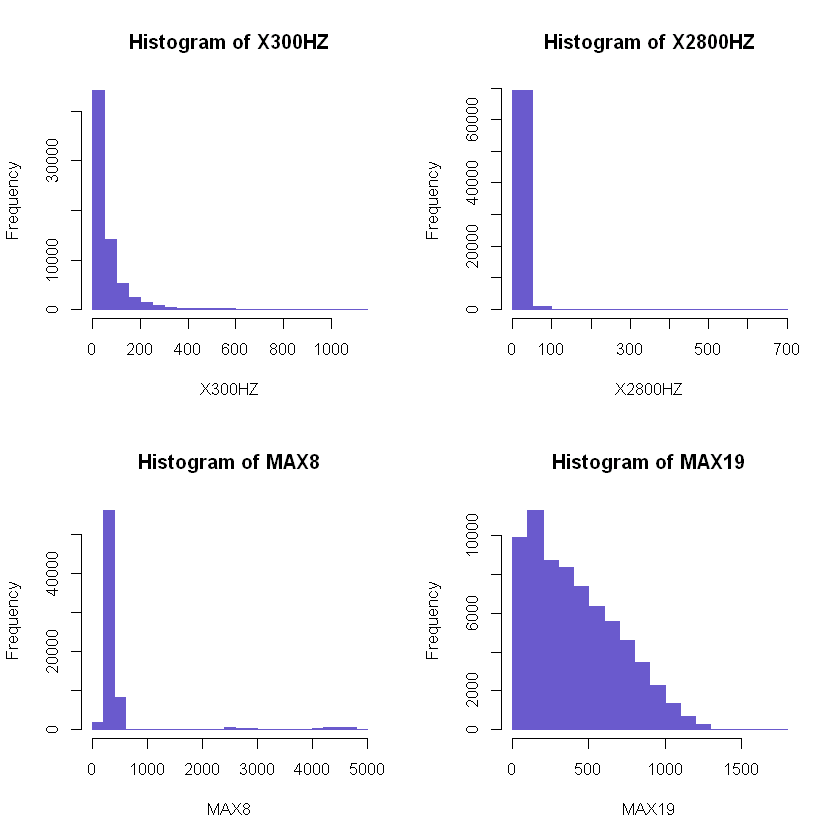

In [23]:
par(mfrow = c(2, 2))

hist(selected_x$X300HZ, 
     main = "Histogram of X300HZ",
     xlab = "X300HZ",
     ylab = "Frequency",
     col = "Slate Blue",
     border = "Slate Blue")

hist(selected_x$X2800HZ, 
     main = "Histogram of X2800HZ", 
     xlab = "X2800HZ",
     ylab = "Frequency",
     col = "Slate Blue",
     border = "Slate Blue")

hist(selected_x$MAX8, 
     main = "Histogram of MAX8",
     xlab = "MAX8",
     ylab = "Frequency",
     col = "Slate Blue",
     border = "Slate Blue")

hist(selected_x$MAX19, 
     main = "Histogram of MAX19",
     xlab = "MAX19",
     ylab = "Frequency",
     col = "Slate Blue",
     border = "Slate Blue")

In [24]:
log_x <- log(selected_x + 1)
log_x

,lrate,X50HZ,X60HZ,X100HZ,X110HZ,X120HZ,X130HZ,X140HZ,X160HZ,X180HZ,⋯,MAX7,MAX8,MAX10,MAX11,MAX12,MAX14,MAX15,MAX16,MAX18,MAX19
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.51086,2.995732,2.890372,2.833213,2.833213,2.833213,2.890372,2.890372,2.890372,2.890372,⋯,5.455321,8.459776,8.453401,5.497168,8.457655,8.455531,5.783825,8.449128,8.457655,5.564520
2,4.51086,1.609438,1.945910,2.944439,3.433987,4.510860,3.806662,3.433987,3.044522,3.610918,⋯,6.442540,5.707110,5.739793,6.049733,5.707110,5.602119,6.023448,5.602119,5.673323,6.289716
3,4.51086,1.386294,1.386294,2.484907,3.258097,3.332205,4.454347,4.110874,3.332205,3.526361,⋯,6.388561,5.484797,5.484797,6.622736,5.484797,5.484797,6.609349,5.484797,5.484797,6.333280
4,4.51086,1.098612,1.098612,1.609438,2.197225,2.833213,2.708050,3.367296,2.564949,1.945910,⋯,6.222576,5.916202,5.916202,6.309918,5.888878,5.916202,6.685861,5.916202,5.916202,6.129050
5,4.51086,1.386294,1.386294,2.944439,2.708050,2.639057,2.397895,1.945910,1.791759,2.484907,⋯,5.774552,6.042633,5.993961,6.257668,5.993961,5.993961,6.135565,5.993961,5.993961,6.246107
6,4.51086,2.079442,2.079442,3.688879,4.158883,4.532599,5.117994,5.293305,3.951244,2.890372,⋯,6.284134,5.707110,5.707110,6.469250,5.707110,5.707110,6.605298,5.707110,5.707110,6.677083
7,4.51086,2.833213,3.218876,3.218876,3.258097,3.218876,3.367296,3.433987,3.433987,3.850148,⋯,6.129050,8.493105,8.484877,6.104793,5.484797,5.484797,6.142037,8.491055,5.484797,6.188264
8,4.51086,2.079442,2.302585,2.302585,2.302585,2.302585,2.302585,2.890372,3.135494,3.091042,⋯,6.030685,6.042633,6.018593,6.447306,6.042633,6.018593,6.280396,6.018593,6.066108,6.232448
9,4.51086,2.079442,2.197225,2.564949,2.944439,3.465736,4.795791,5.147494,4.276666,4.174387,⋯,5.411646,5.888878,5.942799,5.231109,5.888878,5.888878,5.497168,5.942799,5.860786,5.598422


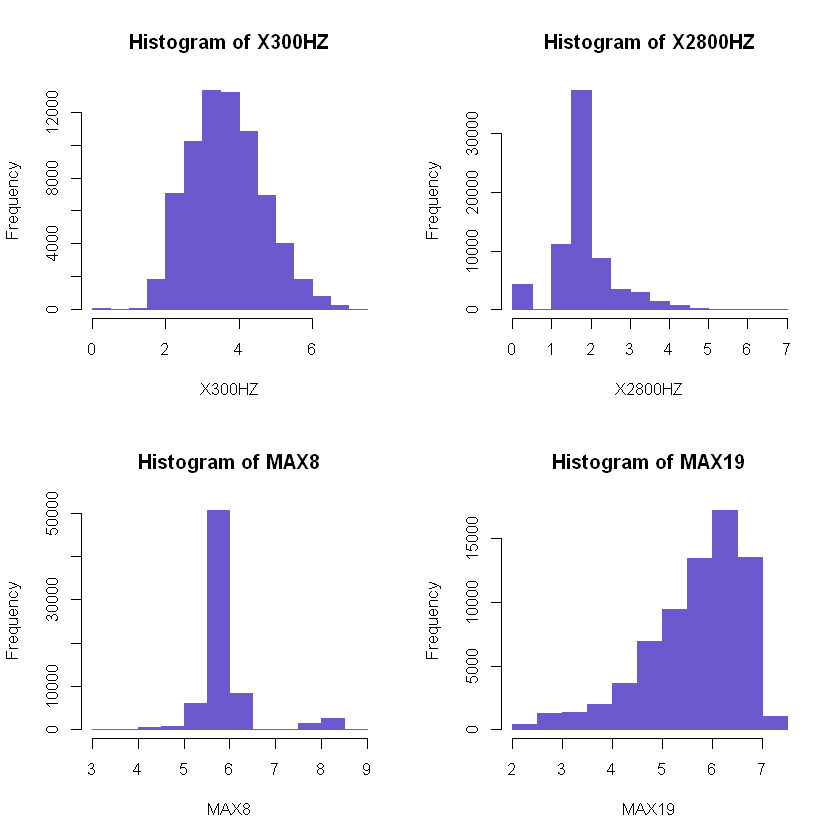

In [25]:
par(mfrow = c(2, 2))

hist(log_x$X300HZ, 
     main = "Histogram of X300HZ",
     xlab = "X300HZ",
     ylab = "Frequency",
     col = "Slate Blue",
     border = "Slate Blue")

hist(log_x$X2800HZ, 
     main = "Histogram of X2800HZ", 
     xlab = "X2800HZ",
     ylab = "Frequency",
     col = "Slate Blue",
     border = "Slate Blue")

hist(log_x$MAX8, 
     main = "Histogram of MAX8",
     xlab = "MAX8",
     ylab = "Frequency",
     col = "Slate Blue",
     border = "Slate Blue")

hist(log_x$MAX19, 
     main = "Histogram of MAX19",
     xlab = "MAX19",
     ylab = "Frequency",
     col = "Slate Blue",
     border = "Slate Blue")

### 원핫인코딩

In [15]:
#library(caret)
one_hot <- dummyVars("~ .", data = cat_vars)
one_hot_x <- data.frame(predict(one_hot, newdata = cat_vars))
one_hot_x

,year2019,year2020,year2021,month01,month02,month03,month04,month05,month06,month07,⋯,weekday목요일,weekday수요일,weekday월요일,weekday일요일,weekday토요일,weekday화요일,season.Winter,season.Spring,season.Summer,season.Autumn
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,0,0,0,0,0,1,⋯,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,1,0,1,0,0
5,0,1,0,0,0,0,0,1,0,0,⋯,0,1,0,0,0,0,0,1,0,0
6,0,0,1,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
7,0,0,1,1,0,0,0,0,0,0,⋯,0,0,0,0,1,0,1,0,0,0
8,0,1,0,0,0,0,1,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
9,1,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,1,0,1,0,0


### 레이블 인코딩

In [17]:
table(as.factor(y))


    in  noise normal  other    out 
 14932   5658  22166   7897  19731 

In [18]:
y=as.factor(as.numeric(as.factor(y))-1)

In [19]:
table(y)

y
    0     1     2     3     4 
14932  5658 22166  7897 19731 

### 데이터 통합

In [27]:
df<-data.frame(log_x, one_hot_x, y)
df

,lrate,X50HZ,X60HZ,X100HZ,X110HZ,X120HZ,X130HZ,X140HZ,X160HZ,X180HZ,⋯,weekday수요일,weekday월요일,weekday일요일,weekday토요일,weekday화요일,season.Winter,season.Spring,season.Summer,season.Autumn,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,4.51086,2.995732,2.890372,2.833213,2.833213,2.833213,2.890372,2.890372,2.890372,2.890372,⋯,1,0,0,0,0,0,0,1,0,4
2,4.51086,1.609438,1.945910,2.944439,3.433987,4.510860,3.806662,3.433987,3.044522,3.610918,⋯,0,0,0,1,0,0,0,1,0,4
3,4.51086,1.386294,1.386294,2.484907,3.258097,3.332205,4.454347,4.110874,3.332205,3.526361,⋯,1,0,0,0,0,0,0,0,1,4
4,4.51086,1.098612,1.098612,1.609438,2.197225,2.833213,2.708050,3.367296,2.564949,1.945910,⋯,0,0,0,0,1,0,1,0,0,4
5,4.51086,1.386294,1.386294,2.944439,2.708050,2.639057,2.397895,1.945910,1.791759,2.484907,⋯,1,0,0,0,0,0,1,0,0,4
6,4.51086,2.079442,2.079442,3.688879,4.158883,4.532599,5.117994,5.293305,3.951244,2.890372,⋯,0,0,0,0,0,1,0,0,0,4
7,4.51086,2.833213,3.218876,3.218876,3.258097,3.218876,3.367296,3.433987,3.433987,3.850148,⋯,0,0,0,1,0,1,0,0,0,4
8,4.51086,2.079442,2.302585,2.302585,2.302585,2.302585,2.302585,2.890372,3.135494,3.091042,⋯,1,0,0,0,0,0,1,0,0,4
9,4.51086,2.079442,2.197225,2.564949,2.944439,3.465736,4.795791,5.147494,4.276666,4.174387,⋯,0,0,0,0,1,0,1,0,0,4


In [28]:
dim(df)

[1] 70384   149

### 학습/훈련 데이터 분리

In [29]:
#libray(caret)
set.seed(22)
index<-createDataPartition(df$y, p=0.7, list=FALSE)

train<-df[index,]
test<-df[-index,]

table(train$y)
table(test$y)

prop.table(table(train$y))
prop.table(table(test$y))


    0     1     2     3     4 
10453  3961 15517  5528 13812 


   0    1    2    3    4 
4479 1697 6649 2369 5919 


         0          1          2          3          4 
0.21215319 0.08039212 0.31493170 0.11219581 0.28032717 


         0          1          2          3          4 
0.21214418 0.08037702 0.31492445 0.11220575 0.28034860 

In [30]:
x_train<-train %>% select(-y)
y_train<-train$y

x_test<-test %>% select(-y)
y_test<-test$y

# 모델링

### KNN

In [33]:
#library(class)
knn_model_time<-system.time({
  knn_model<-knn(x_train, x_test, y_train, k = 3)
})
knn_model_time

tabs_knn<-xtabs(~knn_model+y_test)

#library(caret)
confusionMatrix(tabs_knn)

   user  system elapsed 
 207.32    0.61  482.31 

Confusion Matrix and Statistics

         y_test
knn_model    0    1    2    3    4
        0 4139   47   17   68  114
        1   50 1516   14   40   31
        2   12   11 6560    4    9
        3  102   58   24 2161   88
        4  176   65   34   96 5677

Overall Statistics
                                          
               Accuracy : 0.9498          
                 95% CI : (0.9468, 0.9527)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9338          
                                          
 Mcnemar's Test P-Value : 2.742e-10       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.9241  0.89334   0.9866   0.9122   0.9591
Specificity            0.9852  0.99305   0.9975   0.9855   0.9756
Pos Pred Value         0.9439  0.91823   0.9945   0.8882   0.9387
Neg Pred Value         0.9797  0.99070   0.9939

In [42]:
#library(class)
fit_knn_time<-system.time({
  fit_knn<-knn(train_scaled[, -which(names(train_scaled) == "y")], test_scaled[, -which(names(test_scaled) == "y")], train_scaled$y, k = 3, prob=TRUE)
})
fit_knn_time
#fit_knn

tabs<-xtabs(~fit_knn+test_scaled$y)

#library(caret)
confusionMatrix(tabs)

   user  system elapsed 
 215.11    0.15  357.73 

Confusion Matrix and Statistics

       test_scaled$y
fit_knn    0    1    2    3    4
      0 4139   49   24   62   98
      1   57 1522   16   48   35
      2   12    6 6553    2   11
      3   97   56   25 2166   90
      4  174   64   31   91 5685

Overall Statistics
                                          
               Accuracy : 0.9504          
                 95% CI : (0.9473, 0.9533)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9345          
                                          
 Mcnemar's Test P-Value : 2.63e-12        

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.9241  0.89688   0.9856   0.9143   0.9605
Specificity            0.9860  0.99197   0.9979   0.9857   0.9763
Pos Pred Value         0.9467  0.90703   0.9953   0.8899   0.9404
Neg Pred Value         0.9797  0.99100   0.9934   0.98

### Decision Tree

In [34]:
#library(rpart)
dt_model_time<-system.time({
  dt_model<-rpart(y ~ ., data=train, method="class")
})
dt_model_time
dt_model

pred_dt<-predict(dt_model, newdata = x_test, type = "class")
tabs_dt<-xtabs(~pred_dt+y_test)

#library(caret)
confusionMatrix(tabs_dt)

   user  system elapsed 
   9.94    0.07   18.69 

n= 49271 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 49271 33754 2 (0.21 0.08 0.31 0.11 0.28)  
   2) lrate< 4.38677 15517     0 2 (0 0 1 0 0) *
   3) lrate>=4.38677 33754 19942 4 (0.31 0.12 0 0.16 0.41)  
     6) X370HZ< 2.602003 7359  5270 1 (0.23 0.28 0 0.2 0.28)  
      12) year2020>=0.5 3716  2215 1 (0.15 0.4 0 0.18 0.26) *
      13) year2020< 0.5 3643  2520 0 (0.31 0.16 0 0.23 0.3) *
     7) X370HZ>=2.602003 26395 14657 4 (0.33 0.071 0 0.15 0.44)  
      14) season.Winter>=0.5 8976  5669 0 (0.37 0.11 0 0.21 0.32) *
      15) season.Winter< 0.5 17419  8516 4 (0.31 0.051 0 0.12 0.51) *

Confusion Matrix and Statistics

       y_test
pred_dt    0    1    2    3    4
      0 1861  683    0 1113 1670
      1  261  637    0  267  363
      2    0    0 6649    0    0
      3    0    0    0    0    0
      4 2357  377    0  989 3886

Overall Statistics
                                          
               Accuracy : 0.6173          
                 95% CI : (0.6107, 0.6239)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4831          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity           0.41549  0.37537   1.0000   0.0000   0.6565
Specificity           0.79163  0.95411   1.0000   1.0000   0.7550
Pos Pred Value        0.34935  0.41688   1.0000      NaN   0.5107
Neg Pred Value        0.83416  0.94588   1.0000   0.8878   0.

In [28]:
#library(rpart)5953
fit_rpart_time<-system.time({
  fit_rpart<-rpart(y ~ ., data=train_scaled, method="class")
})
fit_rpart_time
fit_rpart

pred_rpart<-predict(fit_rpart, newdata = test_scaled[, -which(names(test_scaled) == "y")], type = "class")
tabs2<-xtabs(~pred_rpart+test_scaled$y)

#library(caret)
confusionMatrix(tabs2)

   user  system elapsed 
  13.85    0.09   20.25 

n= 49271 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 49271 33754 2 (0.21 0.08 0.31 0.11 0.28)  
  2) lrate< 4.38677 15517     0 2 (0 0 1 0 0) *
  3) lrate>=4.38677 33754 19942 4 (0.31 0.12 0 0.16 0.41) *

Confusion Matrix and Statistics

          test_scaled$y
pred_rpart    0    1    2    3    4
         0    0    0    0    0    0
         1    0    0    0    0    0
         2    0    0 6649    0    0
         3    0    0    0    0    0
         4 4479 1697    0 2369 5919

Overall Statistics
                                          
               Accuracy : 0.5953          
                 95% CI : (0.5886, 0.6019)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.429           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.0000  0.00000   1.0000   0.0000   1.0000
Specificity            1.0000  1.00000   1.0000   1.0000   0.4376
Pos Pred Value            NaN      NaN   1.0000      NaN   0.4092
Neg Pred Value         0.7879  0.

### SVM

In [36]:
#library(e1071)
svm_model_time<-system.time({
  svm_model<-svm(y ~ ., data=train)
})
svm_model_time
svm_model

pred_svm<-predict(svm_model, newdata = x_test)
tabs_svm<-xtabs(~pred_svm+y_test)

#library(caret)
confusionMatrix(tabs_svm)

   user  system elapsed 
1587.33    2.67 2727.50 


Call:
svm(formula = y ~ ., data = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  29335


Confusion Matrix and Statistics

        y_test
pred_svm    0    1    2    3    4
       0 3121  268    4  411  625
       1  113 1025    1  157   70
       2    3    5 6633    4    3
       3  165   81    2 1127  161
       4 1077  318    9  670 5060

Overall Statistics
                                          
               Accuracy : 0.8036          
                 95% CI : (0.7982, 0.8089)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7375          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.6968  0.60401   0.9976  0.47573   0.8549
Specificity            0.9214  0.98244   0.9990  0.97818   0.8635
Pos Pred Value         0.7047  0.75037   0.9977  0.73372   0.7093
Neg Pred Value         0.9186  0.96597   0.9989  0.936

In [29]:
#library(e1071)7942
fit_svm_time<-system.time({
  fit_svm<-svm(y ~ ., data=train_scaled)
})
fit_svm_time
fit_svm

pred_svm<-predict(fit_svm, newdata = test_scaled[, -which(names(test_scaled) == "y")])
tabs3<-xtabs(~pred_svm+test_scaled$y)

#library(caret)
confusionMatrix(tabs3)

   user  system elapsed 
1978.64    4.90 3902.89 


Call:
svm(formula = y ~ ., data = train_scaled)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  29273


Confusion Matrix and Statistics

        test_scaled$y
pred_svm    0    1    2    3    4
       0 3132  265    4  410  614
       1  112 1038    1  154   72
       2    3    5 6635    4    2
       3  158   79    2 1138  158
       4 1074  310    7  663 5073

Overall Statistics
                                          
               Accuracy : 0.8059          
                 95% CI : (0.8005, 0.8113)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7407          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.6993  0.61167   0.9979   0.4804   0.8571
Specificity            0.9223  0.98254   0.9990   0.9788   0.8648
Pos Pred Value         0.7078  0.75381   0.9979   0.7414   0.7118
Neg Pred Value         0.9193  0.96661   0.9990

### Xgboost

In [37]:
train_y<-as.numeric(y_train)-1
test_y<-as.numeric(y_test)-1

dtrain<-xgb.DMatrix(data=as.matrix(x_train), label=train_y)
dtest <- as.matrix(x_test)

In [38]:
#library(xgboost)

params <- list(
  objective = "multi:softmax",
  num_class = length(unique(train_y))
)

xgb_model_time<-system.time({
  xgb_model<-xgb.train(
  params = params,
  data = dtrain,
  nrounds = 100                # 부스팅 라운드 수
  )
})
xgb_model_time
xgb_model

pred_xgb <- predict(xgb_model, dtest)
tabs_xgb<-xtabs(~pred_xgb+test_y)

#library(caret)
confusionMatrix(tabs_xgb)

   user  system elapsed 
 241.10    2.72   76.45 

##### xgb.Booster
raw: 1.3 Mb 
call:
  xgb.train(params = params, data = dtrain, nrounds = 100)
params (as set within xgb.train):
  objective = "multi:softmax", num_class = "5", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
# of features: 148 
niter: 100
nfeatures : 148 

Confusion Matrix and Statistics

        test_y
pred_xgb    0    1    2    3    4
       0 3876   83    0  162  250
       1   70 1473    0   51   34
       2    0    0 6649    0    0
       3   68   43    0 1941   81
       4  465   98    0  215 5554

Overall Statistics
                                          
               Accuracy : 0.9233          
                 95% CI : (0.9196, 0.9268)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8984          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.8654  0.86800   1.0000  0.81933   0.9383
Specificity            0.9702  0.99202   1.0000  0.98976   0.9488
Pos Pred Value         0.8868  0.90479   1.0000  0.90999   0.8771
Neg Pred Value         0.9640  0.98850   1.0000  0.977

### Random Forest

In [40]:
#library(randomForest)
rf_model_time<-system.time({
  rf_model<-randomForest(y ~ ., data=train)
})
rf_model_time
rf_model

pred_rf<-predict(rf_model, newdata = x_test)
tabs_rf<-xtabs(~pred_rf+y_test)

#library(caret)
confusionMatrix(tabs_rf)

   user  system elapsed 
 465.16    3.41  804.09 


Call:
 randomForest(formula = y ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 12

        OOB estimate of  error rate: 4.29%
Confusion matrix:
     0    1     2    3     4 class.error
0 9827   88     1   72   465  0.05988711
1  173 3510     1   71   206  0.11386014
2    0    0 15517    0     0  0.00000000
3  243  105     0 4842   338  0.12409551
4  208   69     0   73 13462  0.02534028

Confusion Matrix and Statistics

       y_test
pred_rf    0    1    2    3    4
      0 4201   63    0   91   80
      1   42 1529    0   33   26
      2    0    0 6649    0    0
      3   23   30    0 2120   30
      4  213   75    0  125 5783

Overall Statistics
                                          
               Accuracy : 0.9606          
                 95% CI : (0.9579, 0.9632)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9479          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.9379  0.90100   1.0000   0.8949   0.9770
Specificity            0.9859  0.99480   1.0000   0.9956   0.9728
Pos Pred Value         0.9472  0.93804   1.0000   0.9623   0.9333
Neg Pred Value         0.9833  0.99138   1.0000   0.9868   0.

In [32]:
#library(randomForest)9513
fit_rf_time<-system.time({
  fit_rf<-randomForest(y ~ ., data=train_scaled)
})
fit_rf_time
fit_rf

pred_rf<-predict(fit_rf, newdata = test_scaled[, -which(names(test_scaled) == "y")])
tabs5<-xtabs(~pred_rf+test_scaled$y)

#library(caret)
confusionMatrix(tabs5)

   user  system elapsed 
 401.19    1.95  579.42 


Call:
 randomForest(formula = y ~ ., data = train_scaled) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 12

        OOB estimate of  error rate: 4.29%
Confusion matrix:
     0    1     2    3     4 class.error
0 9831   88     0   64   470  0.05950445
1  181 3495     3   67   215  0.11764706
2    0    0 15517    0     0  0.00000000
3  244   98     0 4848   338  0.12301013
4  195   81     1   70 13465  0.02512308

Confusion Matrix and Statistics

       test_scaled$y
pred_rf    0    1    2    3    4
      0 4193   62    0   95   76
      1   40 1532    0   33   30
      2    0    0 6649    0    0
      3   29   37    0 2123   30
      4  217   66    0  118 5783

Overall Statistics
                                          
               Accuracy : 0.9605          
                 95% CI : (0.9578, 0.9631)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9478          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.9361  0.90277   1.0000   0.8962   0.9770
Specificity            0.9860  0.99470   1.0000   0.9949   0.9736
Pos Pred Value         0.9474  0.93700   1.0000   0.9567   0.9352
Neg Pred Value         0.9829  0.99153   1.0000   0.98

In [41]:
dtrain <- lgb.Dataset(data = as.matrix(x_train), label = train_y)
dtest <- as.matrix(x_test)

In [42]:
#library(lightgbm)

params <- list(
  objective = "multiclass",          # 다중 클래스 분류
  num_class = length(unique(train_y)),  # 클래스 수
  metric = "multi_logloss"           # 성능 평가 지표
)

# 모델 학습
lgbm_model_time <- system.time({
  lgbm_model <- lgb.train(
    params = params,
    data = dtrain,
    nrounds = 100  # 부스팅 라운드 수
  )
})
lgbm_model_time

pred_lgbm <- predict(lgbm_model, dtest)

# 예측 결과를 클래스 레이블로 변환 (최대 확률 클래스 선택)
pred_lgbm_classes <- max.col(pred_lgbm) - 1  # 0부터 시작하도록 조정

tabs_lgbm <- xtabs(~pred_lgbm_classes+test_y)

#library(caret)
confusionMatrix(tabs_lgbm)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17260
[LightGBM] [Info] Number of data points in the train set: 49271, number of used features: 148
[LightGBM] [Info] Start training from score -1.550447
[LightGBM] [Info] Start training from score -2.520839
[LightGBM] [Info] Start training from score -1.155399
[LightGBM] [Info] Start training from score -2.187510
[LightGBM] [Info] Start training from score -1.271798
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


   user  system elapsed 
   5.80    0.86   11.62 

Confusion Matrix and Statistics

                 test_y
pred_lgbm_classes    0    1    2    3    4
                0 3756  110    0  181  270
                1   98 1422    0   68   43
                2    0    0 6649    0    0
                3   83   39    0 1850   84
                4  542  126    0  270 5522

Overall Statistics
                                          
               Accuracy : 0.9093          
                 95% CI : (0.9054, 0.9132)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8799          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.8386  0.83795   1.0000  0.78092   0.9329
Specificity            0.9663  0.98924   1.0000  0.98901   0.9383
Pos Pred Value         0.8700  0.87186   1.0000  0.89981 

# 앙상블 - 하드 보팅

In [45]:
# 예측 결과 결합
pred <- data.frame(knn = knn_model,
                          rf = pred_rf,
                          xgb = pred_xgb)

# 하드 보팅: 가장 많이 선택된 클래스 선택
final_pred <- apply(pred, 1, function(x) {
  names(sort(table(x), decreasing = TRUE)[1])  # 가장 빈도가 높은 클래스를 선택
})

# 결과 확인
final_pred <- factor(final_pred, levels = levels(y_test))

In [46]:
# 혼동 행렬 생성
confusion_matrix <- confusionMatrix(final_pred, y_test)
print(confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2    3    4
         0 4227   65    0  104  100
         1   37 1549    0   37   28
         2    0    1 6649    0    2
         3   28   24    0 2135   30
         4  187   58    0   93 5759

Overall Statistics
                                          
               Accuracy : 0.9624          
                 95% CI : (0.9597, 0.9649)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9503          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.9437  0.91279   1.0000   0.9012   0.9730
Specificity            0.9838  0.99475   0.9998   0.9956   0.9778
Pos Pred Value         0.9402  0.93822   0.9995   0.9630   0.9446
Neg Pred Value         0.9848  0.9924